## NMF
[2.5. Decomposing signals in components (matrix factorization problems) — scikit-learn 1.0.2 documentation](https://scikit-learn.org/stable/modules/decomposition.html?highlight=nmf#non-negative-matrix-factorization-nmf-or-nnmf)


In [47]:
from sklearn.decomposition import NMF
from sklearn.datasets import make_blobs
import numpy as np

centers = [[5, 10, 5], [10, 4, 10], [6, 8, 8]]
X, _ = make_blobs(centers=centers) # 以centers为中心生成数据
n_components = 2 # 潜在变量的个数
model = NMF(n_components=n_components)
model.fit(X)
W = model.transform(X) # 分解后的矩阵
H = model.components_

print(X.shape)
print(W.shape)
print(H.shape)
print(H)
#print(W)

V = np.dot(W,H)

for i in range(10):
    print('V - ', V[i:(i+1),:])
    print('X - ', X[i:(i+1),:])

print('reconstruction_err_', model.reconstruction_err_)  # 损失函数值
print('n_iter_', model.n_iter_)  # 实际迭代次数




(100, 3)
(100, 2)
(2, 3)
[[7.2218991  1.9664158  7.5930157 ]
 [0.         8.54594098 0.67940793]]
V -  [[ 4.02444789 10.53787994  4.98190669]]
X -  [[ 3.97607259 10.53414786  5.02885065]]
V -  [[ 4.28984302 10.31787803  5.23770459]]
X -  [[ 3.64857704 10.26837202  5.86041649]]
V -  [[11.08805509  5.50690252 11.85562539]]
X -  [[11.41653497  5.53226337 11.53662362]]
V -  [[10.01053152  3.5896554  10.59363297]]
X -  [[ 9.77021692  3.57110228 10.82700371]]
V -  [[5.10985528 9.74851337 6.03683982]]
X -  [[6.7056925  9.87172165 4.48706309]]
V -  [[ 3.38946804 10.00635625  4.28578553]]
X -  [[ 3.40076885 10.00723133  4.27477823]]
V -  [[4.35793099 9.89882675 5.2745027 ]]
X -  [[4.97472468 9.94644853 4.67549163]]
V -  [[8.87580932 5.8164594  9.60219557]]
X -  [[ 7.72009432  5.72723395 10.72451907]]
V -  [[5.99988805 7.38242583 6.76523739]]
X -  [[5.61328876 7.35258027 7.14065017]]
V -  [[9.31123449 4.82752722 9.97194989]]
X -  [[ 9.27993843  4.82511168 10.00233377]]
reconstruction_err_ 10.329

/Users/alphajay/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/alphajay/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


##  olivetti_faces MNF

(4096, 400)
Dataset consists of 400 faces, features is 4096
Extracting the top 6 Non-negative components - NMF...
done in 0.133s
components_: (6, 4096) 
**
 [[  0.           0.           0.         ...   8.47930895   9.17286304
    9.50178305]
 [307.44670826 331.3063659  352.37269434 ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...  49.03347129  48.58511386
   53.3622545 ]
 [  0.           0.           0.         ... 490.53895214 511.87157392
  488.21654134]
 [ 31.76317671  29.984939    27.59062498 ...  98.52633072  97.14706167
   92.77534811]
 [ 86.48513011  87.3752808   88.43348544 ...  61.76492362  62.71729237
   62.94962925]]


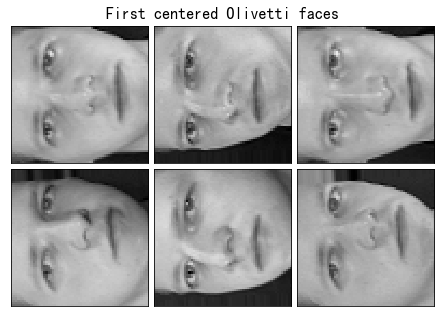

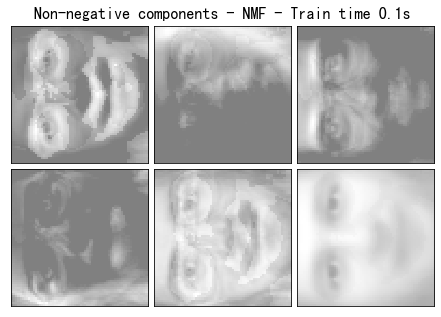

In [48]:
from time import time
from numpy.random import RandomState
import matplotlib.pyplot as plt
#from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
import scipy.io as spio

n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# #############################################################################
# Load faces data
# dataset = fetch_olivetti_faces('./', True,random_state=rng)

datafile = '../resource/data/olivettifaces/olivettifaces.mat'
dataset = spio.loadmat(datafile)
# print(dataset.keys())
# dict_keys(['__header__', '__version__', '__globals__', 'faces', 'p', 'u', 'v'])
faces = np.transpose(dataset['faces'])
print(dataset['faces'].shape)

n_samples,n_features= faces.shape

print("Dataset consists of %d faces, features is %s" % (n_samples, n_features))

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)


# #############################################################################
estimators = [
    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3))
]

# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces[:n_components])

# #############################################################################
# Do the estimation and plot it

for name, estimator in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)

    components_ = estimator.components_
    print('components_:', components_.shape, '\n**\n', components_)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_)
plt.show()